In [164]:
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

In [165]:
# load all data
data = pd.read_csv('winequality-white.csv', delimiter=';')

# try shuffle data
data = data.sample(frac=1).reset_index(drop=True)

n_features = data.shape[1] - 1

#preprocess normalise
from sklearn.preprocessing import Normalizer
norm = Normalizer()
data.iloc[:, :n_features] = norm.fit_transform(data.iloc[:, :n_features])

# randomly split data into training set (80%) and testing set (20%)
msk = np.random.rand(len(data)) < 0.8
train_data = data[msk]
test_data = data[~msk]

# split training data into input and target
# the first columns are features, the last one is target
train_input = train_data.iloc[:, :n_features]
train_target = train_data.iloc[:, n_features]

# split testing data into input and target
# the first columns are features, the last one is target
test_input = test_data.iloc[:, :n_features]
test_target = test_data.iloc[:, n_features]

# create Tensors to hold inputs and outputs
X = torch.Tensor(train_input.values).float()
Y = torch.Tensor(train_target.values).float()
Y = torch.reshape(Y, (Y.shape[0],1))
test_X = torch.Tensor(test_input.values).float()
test_Y = torch.Tensor(test_target.values).float()
test_Y = torch.reshape(test_Y, (test_Y.shape[0],1))

In [166]:
# Hyper Parameters
n_hidden = 5
num_epochs = 501
learning_rate = 0.01

# define our regression model
class Regression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Regression, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size)   # hidden layer
        self.hidden2 = torch.nn.Linear(hidden_size, hidden_size)
        self.predict = torch.nn.Linear(hidden_size, output_size)   # output layer
    def forward(self, x):
        x = F.relu(self.hidden1(x))      # activation function for hidden layer
        x = F.relu(self.hidden2(x))
        x = self.predict(x)                 # linear output
        return x

net = Regression(input_size=n_features, hidden_size=n_hidden, output_size=1)     # define the network

# define loss function
# Softmax is internally computed in nn.CrossEntropyLoss.
loss_func = nn.MSELoss()

# define optimiser
optimiser = torch.optim.Adam(net.parameters(), lr=learning_rate)

t =  0 training loss =  32.687530517578125 accuracy =  0.0
t =  50 training loss =  3.274199962615967 accuracy =  33.231784716933234
t =  100 training loss =  0.770240068435669 accuracy =  91.03833460269104
t =  150 training loss =  0.7496514320373535 accuracy =  90.3021071337903
t =  200 training loss =  0.7478443384170532 accuracy =  90.14978420919014
t =  250 training loss =  0.745995283126831 accuracy =  90.35288144199035
t =  300 training loss =  0.744113028049469 accuracy =  90.14978420919014
t =  350 training loss =  0.7422428727149963 accuracy =  89.94668697638994
t =  400 training loss =  0.7404181957244873 accuracy =  89.66742828128967
t =  450 training loss =  0.7386618852615356 accuracy =  89.38816958618939
t =  500 training loss =  0.7369887232780457 accuracy =  89.43894389438944


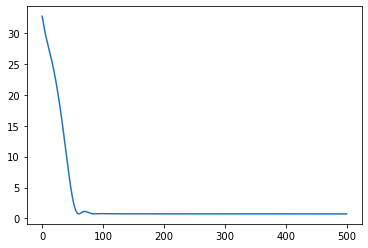

In [167]:
# store all losses for visualisation
all_losses = []
n_items = Y.shape[0]
pct_close = 0.2

for t in range(num_epochs):
    # pass input x and get prediction
    prediction = net(X)

    # calculate loss
    loss = loss_func(prediction, Y)
    all_losses.append(loss.item())

    # clear gradients for next train
    optimiser.zero_grad()

    # perform backward pass
    loss.backward()

    # call the step function on an Optimiser makes an update to its
    # parameters
    optimiser.step()

    if t % 50 == 0:
        n_correct = torch.sum((torch.abs(prediction - Y) < torch.abs(pct_close * Y)))
        result = (n_correct.item() * 100.0 / n_items)
        print("t = ",t,"training loss = ",loss.item(), "accuracy = ",result)
        
plt.figure()
plt.plot(all_losses)
plt.show()

In [168]:
#testing
net = net.eval()
n_items = test_Y.shape[0]
n_correct = torch.sum((torch.abs(net(test_X) - test_Y) < torch.abs(pct_close * test_Y)))
result = (n_correct.item() * 100.0 / n_items)
test_loss = loss_func(net(test_X), test_Y)
print("loss = ", test_loss.item(), "accuracy = ",result)

loss =  0.7469558715820312 accuracy =  89.05109489051095
